Problem Statement:
Over the past four weeks, engaged sessions per active user (ESAU) have declined by approximately 8%. This decline coincides with the rollout of SmartFeed_v2, raising concerns about potential negative product impact. Leadership needs to determine whether this drop reflects a true product regression or external factors, and decide whether corrective action is required.

In [6]:
import numpy as np
import pandas as pd

from datetime import timedelta
np.random.seed(42)

events = pd.read_csv('data_design/events.csv')

In [7]:
events.head()

,user_id,event_time,event_name,feature_exposed,first_seen,is_returning
0,1,2025-10-22 18:11:00,session_start,0,2025-10-22 13:53:00,False
1,1,2025-10-22 13:53:00,session_start,0,2025-10-22 13:53:00,False
2,1,2025-10-25 11:17:00,session_start,0,2025-10-22 13:53:00,False
3,1,2025-10-25 05:26:00,session_start,0,2025-10-22 13:53:00,False
4,1,2025-10-27 22:08:00,session_start,1,2025-10-22 13:53:00,False


<Axes: title={'center': 'Engaged Sessions per Active User (Exec View)'}, xlabel='date'>

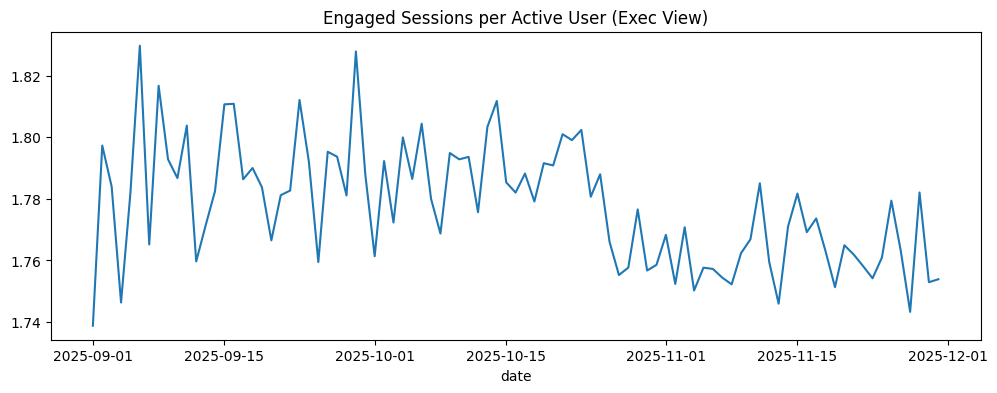

In [12]:
events["date"] = pd.to_datetime(events['event_time']).dt.date
daily_active_users = (
    events.groupby("date")["user_id"].nunique()
)

daily_sessions = (
    events.groupby("date").size()
)

esau = daily_sessions / daily_active_users

esau.plot(
    title="Engaged Sessions per Active User (Exec View)",
    figsize=(12, 4)
)


<Axes: title={'center': 'Daily Sessions (Exec View)'}, xlabel='date'>

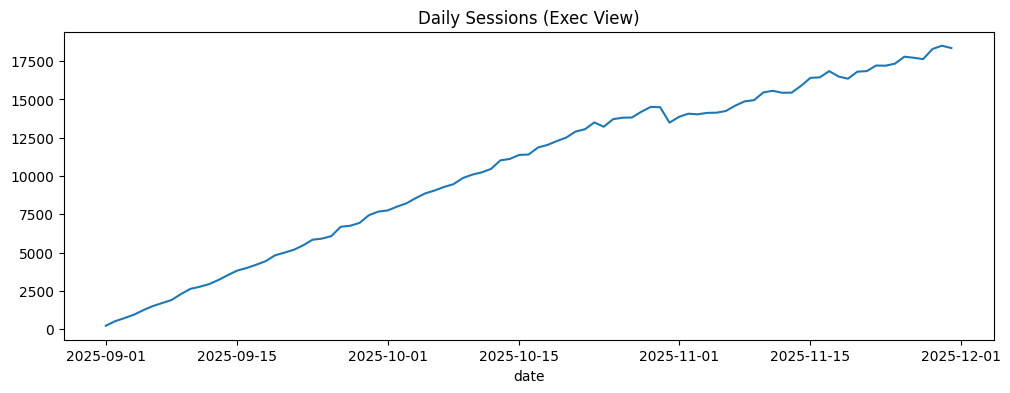

In [13]:
daily_sessions = (
    events
    .assign(date=pd.to_datetime(events['event_time']).dt.date)
    .groupby("date")
    .size()
)

daily_sessions.plot(
    title="Daily Sessions (Exec View)",
    figsize=(12, 4)
)
